<a href="https://colab.research.google.com/github/jdk455/NUS-Lab/blob/main/SWS3009Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWS3009 Lab 6 Statistical Methods



|      Members            |
|---------------------|
 |    CAI Jiajun              |
 |       MA Jiaolin            |
|   XIE Jinxiang             |

In this lab you will also be do some experiments to familiarize yourself with the linear regression, Naive Bayes and Support Vector Machine library in SciKit Learn.

Please work together as a team of 2 to complete this lab. You will need to submit ONE copy of this notebook per team, but please fill in the names of both team members above. This lab is worth 3 marks:

**0 marks**: No submission, empty submission or non-English submission.

**1 mark** : Poor submission.

**2 marks**: Acceptable submission.

**3 marks**: Good submission.

## SUBMISSION INSTRUCTIONS

Please submit this completed Jupyter Notebook (SWS3009Lab6.ipynb) to the Canvas by **11.59 PM** on **TUESDAY 11 JULY 2023**. All submissions must be in English. Submissions that are not in English will not be marked.

Let's now begin using statistical techniques in SciKit Learn.

## 1. SciKit Learn Hands-on

We will now run some experiments to familiarize you with the statistical learning tools in SciKit Learn.

### 1.1 Linear Regression

Let's begin by playing around with the linear regression we did for the Boston Housing Dataset during the lecture.

#### 1.1.1 Finding Better Correlations

In the lecture we looked at correlating housing prices and poverty levels.  Using the code cell below:

    1. Recreate the regression example from the lecture.
    2. Add code to find the correlation between housing prices and the other independent variables in the dataset.
    3. As before save 33% of the data for testing.
    4. Create a new simple (single independent variable) regression model with the independent variable with the highest dataset. If poverty levels is the highest, then choose the next highest.
    5. Compute and print the MSE for training data and testing data, and answer the questions after the code block.


Correlations between housing prices and independent variables:
CRIM: -0.38830460858681143
ZN: 0.3604453424505435
INDUS: -0.48372516002837357
CHAS: 0.1752601771902987
NOX: -0.4273207723732826
RM: 0.6953599470715393
AGE: -0.37695456500459623
DIS: 0.24992873408590394
RAD: -0.3816262306397775
TAX: -0.46853593356776685
PTRATIO: -0.5077866855375616
B: 0.3334608196570666
LSTAT: -0.7376627261740151

MSE for training data: 45.82902170074135
MSE for testing data: 39.091051114869956
Training accuracy (R-squared score): 0.4800686358449544
Testing accuracy (R-squared score): 0.4834590168919487


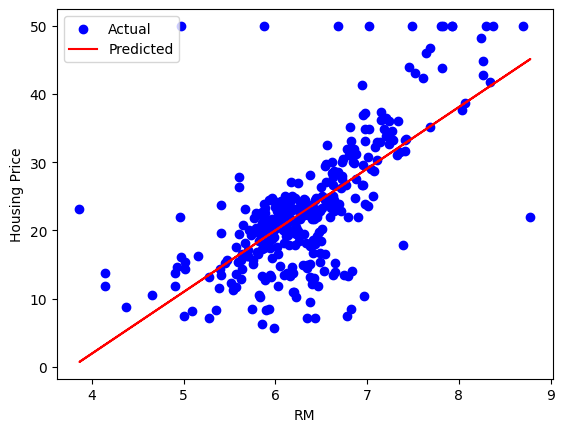

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

feature_names = {
    0: 'CRIM',
    1: 'ZN',
    2: 'INDUS',
    3: 'CHAS',
    4: 'NOX',
    5: 'RM',
    6: 'AGE',
    7: 'DIS',
    8: 'RAD',
    9: 'TAX',
    10: 'PTRATIO',
    11: 'B',
    12: 'LSTAT',
    13: 'MEDV'
}
# CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's
# Load the Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]
# boston = datasets.load_boston()

# Calculate correlations between housing prices and all independent variables
correlations = np.corrcoef(data, target, rowvar=False)[:-1, -1]

# Print correlations
print("Correlations between housing prices and independent variables:")
for idx in range(13):
    print(f"{feature_names[idx]}: {correlations[idx]}")

# Find the variable with the highest correlation (ignoring poverty levels)
highest_corr_idx = np.argsort(-correlations)[:-1][0]
highest_corr_feature = feature_names[highest_corr_idx]

# Create the data for the new linear regression model
X = data[:, highest_corr_idx].reshape(-1, 1)
y = target

# Split the data into training and testing sets (keeping 33% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create the linear regression model
regression = LinearRegression()

# Train the model
regression.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = regression.predict(X_train)
y_test_pred = regression.predict(X_test)

# Calculate the mean squared error for training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
# Calculate the accuracies (R-squared score) for training and testing data
train_accuracy = regression.score(X_train, y_train)
test_accuracy = regression.score(X_test, y_test)



# Print the mean squared errors
print(f"\nMSE for training data: {mse_train}")
print(f"MSE for testing data: {mse_test}")
print(f"Training accuracy (R-squared score): {train_accuracy}")
print(f"Testing accuracy (R-squared score): {test_accuracy}")


# Plot the regression line
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel(highest_corr_feature)
plt.ylabel('Housing Price')
plt.legend()
plt.show()

Answer the following questions between the \*\* markdowns so that your answers appear in bold.

***
_Question 1: Which independent variable has the highest correlation? Did it have any effect on your training and test accuracy scores? Why or why not?_

***

**The independent variable with the highest correlation to housing prices is RM (average number of rooms per dwelling) with a correlation of 0.6953599470715393.**

**In this case, the independent variable with the highest correlation is used to build the linear regression model, which affects the training and test accuracy scores. A higher correlation generally leads to better model performance, as the model can capture more of the variation in the housing prices using this single variable.**

#### 1.1.2 Creating Multivariate Linear Regressions ####

SciKit learn can create linear regression models with multiple independent variables, and in this section we are going to explore how to do this, and whether or not it makes a difference in our Boston Dataset.

One way to create a multivariate model is to:

    1. Rank the independent variables by correlation, then create a linear model using the independent variable with the highest correlation. Measure the training and testing accuracy.
    2. Add in the independent variable with the next highest correlation and create a new linear model.  Measure the training and testing accuracy.
    3. Stop when either accuracy score levels off or goes down.

Answer the following questions to help you along with creating your multivariate model:

***

_Question 2: Explain what the following code fragment does. You may refer to NumPy and SciKit Learn documentation_

```
bos['PRICE'].values.reshape(-1, 1)
```

**This code fragment reshapes the 'PRICE' column of the bos DataFrame (which represents housing prices) into a 2D NumPy array with a single column.**

**bos['PRICE']**: This selects the 'PRICE' column from the bos DataFrame.

**.values**: This converts the selected column (a pandas Series) into a NumPy array.

**.reshape(-1, 1)**: This reshapes the 1D NumPy array into a 2D array with a single column. The -1 means that the number of rows is inferred automatically based on the data's length.


_Question 3: Consult the NumPy documentation: What does the 'concatenate' function do? In particular what does 'axis=1' do?_

**The concatenate function in NumPy is used to join two or more arrays along an existing axis. The function takes a tuple or list of arrays as its first argument and combines them in the specified order. The axis=1 parameter indicates that the input arrays should be concatenated horizontally, or column-wise.**

_Question 4: Given your answers to Questions 2 and 3, what does the following code do?_

```
import numpy as np

... Other code here ...

X1 = bos['INDUS'].values.reshape(-1, 1)
X2 = bos['CRIM'].values.reshape(-1, 1)
X = np.concatenate((X1, X2), axis = 1)
```

**This code snippet combines two features from the bos DataFrame, 'INDUS' (proportion of non-retail business acres per town) and 'CRIM' (per capita crime rate by town), into a single 2D array, which serves as input data (X) for a machine learning model or further analysis.**

***

Use the following code cell to follow the steps above to create models with one, two and three independent variables, printing the training and testing accuracy each time. Note that you have to run _train_test_split_ for each model. Set the _random_state_ parameter in _train_test_split_ to 0 each time.

In [27]:
# Create a function that builds a linear regression model with the top n features
def build_model_with_top_n_features(n, data, target, feature_correlations, feature_names):
    # Get the indices of the top n features
    top_n_features_idx = np.argsort(-feature_correlations)[:-1][:n]
    for i in range(n):
        print("---using feature:", feature_names[top_n_features_idx[i]])

    # Create the data for the new linear regression model
    X = data[:, top_n_features_idx]
    y = target

    # Split the data into training and testing sets (keeping 33% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

    # Create the linear regression model
    regression = LinearRegression()

    # Train the model
    regression.fit(X_train, y_train)

    # Make predictions on the training and testing data
    y_train_pred = regression.predict(X_train)
    y_test_pred = regression.predict(X_test)

    # Calculate the mean squared error for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Calculate the accuracies (R-squared score) for training and testing data
    train_accuracy = regression.score(X_train, y_train)
    test_accuracy = regression.score(X_test, y_test)

    return mse_train, mse_test, train_accuracy, test_accuracy

# Build models with the top 1, 2, and 3 features and print their training and testing accuracies
for n in range(1, 4):
    print(f"Model with top {n} features:")
    mse_train, mse_test, train_accuracy, test_accuracy = build_model_with_top_n_features(n, data, target, correlations, feature_names)
    print(f"MSE for training data: {mse_train}")
    print(f"MSE for testing data: {mse_test}")
    print(f"Training accuracy (R-squared score): {train_accuracy}")
    print(f"Testing accuracy (R-squared score): {test_accuracy}")
    print("")

Model with top 1 features:
---using feature: RM
MSE for training data: 43.13183114425634
MSE for testing data: 44.607528947273686
Training accuracy (R-squared score): 0.49869569568611116
Testing accuracy (R-squared score): 0.4467086858567656

Model with top 2 features:
---using feature: RM
---using feature: ZN
MSE for training data: 40.65910833679054
MSE for testing data: 43.84398123330902
Training accuracy (R-squared score): 0.5274351800500343
Testing accuracy (R-squared score): 0.45617938123130486

Model with top 3 features:
---using feature: RM
---using feature: ZN
---using feature: B
MSE for training data: 37.59664434892634
MSE for testing data: 37.052604022927426
Training accuracy (R-squared score): 0.5630289941356912
Testing accuracy (R-squared score): 0.5404165068971529



### 1.2 Creating a Naive Bayes Classifier ###

We will now look at how to create a Naive Bayes Classifier, and later on a Support Vector Machine classifier. We will also explore the use of _GridSearchCV_ to optimize the choice of parameters for the SVC.

#### 1.2.1 The Irises Dataset ###

In this lab we will use the irises dataset to classify four categories of irises (a species of flowers). We will consider four factors:

    1. Sepal length in cm
    2. Sepal width in cm
    3. Petal length in cm
    4. Petal width in cm

The image below shows what these mean:

![iris.png](attachment:image.png)

The code cell below loads up the Iris dataset, prints it out, then scales it.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np

iris_data = load_iris()
print("Iris Data:")
print(iris_data.data)
scaler = StandardScaler()
scaler.fit(iris_data.data)
X = scaler.transform(iris_data.data)
Y = iris_data.target


Iris Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 

Answer the following questions:

_Question 5: What does 'StandardScaler' do? What other types of scalers are available? What is the advantage of scaling your inputs?_

**StandardScaler is a preprocessing utility in scikit-learn that standardizes features by removing the mean and scaling to unit variance. This means that, for each feature, it subtracts the mean and divides it by the standard deviation.**

There are other types of scalers available in scikit-learn, including:

**MinMaxScaler**: Scales features by transforming them to a specific range, typically between 0 and 1, or a custom range specified by the user.

**MaxAbsScaler**: Scales each feature by its maximum absolute value, transforming the data within the range [-1, 1]. This scaler is useful for data that is already centered at zero or sparse data.

**RobustScaler**: Scales features using statistics that are robust to outliers. It removes the median and scales the data according to the interquartile range (IQR).

**Scaling the inputs ensures that all features have a comparable range of values, which allows the algorithm to learn more effectively from the data.**


#### 1.2.2 Creating a Naive Bayes Classifier Model

Recall that there are three major types of Naive Bayes classifiers:

    1. Gaussian
    2. Multinomial
    3. Bernoulli
    
_Question 6: What type of model should we use here? Why?_

**For the Iris dataset, we should use a Gaussian Naive Bayes classifier. The reason is that the Gaussian Naive Bayes classifier is well-suited for continuous numerical features, and the Iris dataset consists of continuous numerical measurements (sepal length, sepal width, petal length, and petal width).**

**Multinomial Naive Bayes**: This classifier is typically used for discrete features, such as text data represented as word counts or term frequencies.**

**Bernoulli Naive Bayes**: This classifier is used for binary or boolean features (e.g., presence or absence of a particular word in a document).


Now complete the code in the code cell below, following these specifications:

    1. Set aside 20% of the data for testing.
    2. Use the appropriate type of Naive Bayes Classifier, adding in whatever import statements you require here.
    3. Print out the training and testing accuracies.
    

In [ ]:
from sklearn.metrics import accuracy_score

# Set aside 20% of the data for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Use the appropriate type of Naive Bayes Classifier (GaussianNB)
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, Y_train)

# Make predictions on the training and testing data
Y_train_pred = gnb.predict(X_train)
Y_test_pred = gnb.predict(X_test)

# Calculate the training and testing accuracies
training_accuracy = accuracy_score(Y_train, Y_train_pred)
testing_accuracy = accuracy_score(Y_test, Y_test_pred)

# Print the training and testing accuracies
print(f"Training accuracy: {training_accuracy}")
print(f"Testing accuracy: {testing_accuracy}")

Training accuracy: 0.95
Testing accuracy: 1.0


#### 1.2.3 Using Pipelines ####

In the Naive Bayes Jupyter Notebook included with your Lecture 3 slides, we used a _Pipeline_ object to simplify our code. Using that example as a guide, rewrite your code above to use _Pipeline_. Some things to note:

    1. The code will not be exactly the same (it will be much simpler). For example we are not using a CountVectorizer nor a TfidfTransformer. So just follow the principle. Remember to put your StandardScaler into the Pipeline.
    2. When doing 'fit' on your model, you should input the _original_ data, not the scaled one, since we are incorporating the StandardScaler as part of our Pipeline.

**Hint: Section 1.3.2 below shows you how to create a Pipeline for SVM**

Use the code cell below to enter your new version using Pipelines. Remember to print out your training and testing accuracies.


In [26]:
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GaussianNB())
])

# Train the model using the original data (not scaled)
pipeline.fit(iris_data.data, iris_data.target)

# Split the original data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

# Make predictions on the training and testing data
Y_train_pred = pipeline.predict(X_train)
Y_test_pred = pipeline.predict(X_test)

# Calculate the training and testing accuracies
training_accuracy = accuracy_score(Y_train, Y_train_pred)
testing_accuracy = accuracy_score(Y_test, Y_test_pred)

# Print the training and testing accuracies
print("Naive Bayes Train Accuracy: %3.4f" % training_accuracy)
print("Naive Bayes Train Accuracy: %3.4f" % testing_accuracy)


Naive Bayes Train Accuracy: 0.9500
Naive Bayes Train Accuracy: 1.0000


## 1.3 Creating a Support Vector Machine Classifier ###

We will now create an SVM to perform our classification. There are two major SVM classifiers provided with SciKit Learn:

    1. LinearSVC: An SVM that uses a linear decision boundary to classify.
    2. SVC: An SVM that offers a wider variety of classification boundaries: Radial Basis Function (so-called 'kernel'), sigmoid, polynomials, and of course a linear boundary.
    
#### 1.3.1 Creating a Linear SVM ####

Using your code from 1.2.3 as a guide, create a new Pipeline to train a LinearSVC with the following parameters:

    - max_iter: 100000
    - loss: hinge
    - penalty: l2      (Note: This is 'el-two', and not 'twelve')
    
Use the code cell below to implement your SVM, printing out your training and testing accuraces. Please consult the SciKit Learn documentation on what these parameters mean.


In [22]:
from sklearn.svm import LinearSVC

# Create a pipeline with StandardScaler and LinearSVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LinearSVC(max_iter=100000, loss='squared_hinge', penalty='l2', dual=False))
])

# Train the model using the original data (not scaled)
pipeline_svm.fit(iris_data.data, iris_data.target)

# Make predictions on the training and testing data
Y_train_pred_svm = pipeline_svm.predict(X_train)
Y_test_pred_svm = pipeline_svm.predict(X_test)

# Calculate the training and testing accuracies for LinearSVC
training_accuracy_svm = accuracy_score(Y_train, Y_train_pred_svm)
testing_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)

# Print the training and testing accuracies for LinearSVC
print(f"SVM Training accuracy: {training_accuracy_svm}")
print(f"SVM Testing accuracy: {testing_accuracy_svm}")

SVM Training accuracy: 0.9416666666666667
SVM Testing accuracy: 0.9666666666666667


***
_Question 7: Play around with the loss and penalty parameters. E.g. try an 'l1' penalty with hinge loss, or 'l1' penalty with squared hinge loss. Does 'l2' work with the squared hinge loss function? Record your training and testing accuracies below_


|penalty|loss|train_acc|test_acc|
|----|----|----|----|
|    l1 | hinge    |    |    |
|    l1 | squared_hinge     | 0.95   |1.0|
|    l2 | hinge    | 0.9167   | 0.9667   |
|    l2 | squared_hinge    | 0.9417   | 0.9667   |

**The 'l2' can work with squared hinge loss function, but 'l1' can not work with hinge loss function**

**The hinge loss function is not differentiable at 0, while the 'l1' penalty involves an absolute value of the weights, which is also not differentiable at 0. When both the loss function and the penalty term are not differentiable, it becomes challenging to find optimal solutions using gradient-based optimization methods that are commonly used for training SVMs.**

**On the other hand, the 'l2' penalty involves the squared weights, which is a differentiable function. When combined with the squared hinge loss function, which is also differentiable, it leads to a smooth optimization problem that can be solved more easily using gradient-based optimization methods.**




***

#### 1.3.2 Autotuning Hyperparameters ####

In Question 7 you have played around with some of the hyperparameters for LinearSVC and may have found that it gives you different accuracy results. Selecting the right hyperparameters is always a challenge, but thankfully SciKit Learn gives us a very useful tool called "GridSearchCV". In the example below we see how to tweak the 'C' parameter, which controls penalties applied to the SVM parametrs, to various values of between 1 and 10. GridSearchCV will then select the C value that gives us the best possible training accuracy:

```
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

params = {'C':[1,10]}

svm_pipe_2 = Pipeline([('scaler', StandardScaler()),
                    ('svm', GridSearchCV(svm.LinearSVC(max_iter = 100000), params)), ])
svm_pipe_2.fit(X_train_1, Y_train_1)

Y_train_pred_1 = svm_pipe_2.predict(X_train_1)
Y_test_pred_1 = svm_pipe_2.predict(X_test_1)

print("SVM Train Accuracy: %3.2f" % np.mean(Y_train_pred_1 == Y_train_1))
print("SVM Test Accuracy: %3.2f" % np.mean(Y_test_pred_1 == Y_test_1))
```

Note that the code above will not run because it's missing several variables, including X_train_1, etc. Notice that GridSearchCV is created in the Pipeline and takes svm.LinearSVC as a parameter.

The "param" variable is a dictionary that specifies which parameters to tune (in this case just simply 'C'), and what values to use (here \[1, 10\] means to use between 1 and 10). You can also specify labels instead of numeric values. E.g.:

```
params = {'kernel':('linear', 'poly')}
```

GridSearchCV will try 'linear' and 'poly', specified in the tuple after 'kernel', when tuning the SVM.

Use the code cell below to create a Pipeline that uses SVC (instead of LinearSVC), and applies GridSearchCV to tune the following hyperparameters:

    - C: From 1 to 10 as before
    - kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    - decision_function_shape: 'ovr', 'ovo'
    
***
_Question 8: Consult the SVC documentation and write down below what each hyperparameter means. Also what is a 'decision function shape', and what is the difference between 'ovr' and 'ovo' in our decision function shape?_

**Answer: Put your answer here. Do not hit enter to go to the next line.**

***

Remember to print out the training and testing accuracies.

In [25]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris_data = load_iris()
X_train, X_test, Y_train, Y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=42)

params = {
    'C': range(1, 11),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovr', 'ovo']
}

svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', GridSearchCV(svm.SVC(), params, verbose=2))
])

svm_pipe.fit(X_train, Y_train)

# Display the grid search process and results
# print("Grid Search Results:")
# print(svm_pipe.named_steps['svm'].cv_results_)

# Display the best hyperparameters found
print("Best Hyperparameters:")
print(svm_pipe.named_steps['svm'].best_params_)

Y_train_pred = svm_pipe.predict(X_train)
Y_test_pred = svm_pipe.predict(X_test)

print("SVM Train Accuracy: %3.4f" % accuracy_score(Y_train, Y_train_pred))
print("SVM Test Accuracy: %3.4f" % accuracy_score(Y_test, Y_test_pred))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ....C=1, decision_function_shape=ovr, kernel=linear; total time=   0.0s
[CV] END ....C=1, decision_function_shape=ovr, kernel=linear; total time=   0.0s
[CV] END ....C=1, decision_function_shape=ovr, kernel=linear; total time=   0.0s
[CV] END ....C=1, decision_function_shape=ovr, kernel=linear; total time=   0.0s
[CV] END ....C=1, decision_function_shape=ovr, kernel=linear; total time=   0.0s
[CV] END ......C=1, decision_function_shape=ovr, kernel=poly; total time=   0.0s
[CV] END ......C=1, decision_function_shape=ovr, kernel=poly; total time=   0.0s
[CV] END ......C=1, decision_function_shape=ovr, kernel=poly; total time=   0.0s
[CV] END ......C=1, decision_function_shape=ovr, kernel=poly; total time=   0.0s
[CV] END ......C=1, decision_function_shape=ovr, kernel=poly; total time=   0.0s
[CV] END .......C=1, decision_function_shape=ovr, kernel=rbf; total time=   0.0s
[CV] END .......C=1, decision_function_shape=ov

### 1.4 Summary ###


***
_Question 9: Summarize in the table given below all the training and testing accuracies you've had in the previous section.  Give your thoughts on the performance of the various classifiers, and on using GridSearchCV to search for the right hyperparameters._

| Method    |classify or regress       |dataset | Training Accuracy(For Regression, refer to R^2 score) | Testing Accuracy(For Regression, refer to R^2 score) |
|:-----------------:|:-----------------:|:----------------:|:-----------------:|:-----------------:|
| Linear Regression | Regression | boston|  0.4801              |             0.4835     |
| LR (2 var)        | Regression  | boston|0.5274               |     0.4561             |
| LR (3 var)        |  Regression  |boston |  0.5630            |       0.5404           |
| Naive Bayes       |   Classification  | iris |0.9500             |       1.0000           |
| LinearSVC         |    Classification  | iris | 0.9417           |         0.9667         |
| SVC (GridSearch)  |   Classification  |  iris|0.9619            |       0.9778           |

***


**Linear Regression**: The performance of the linear regression models on the Boston dataset improves as more features are included. However, the increase in the number of features can lead to overfitting, so it's essential to select features that are most relevant to the target variable. In this case, the 3-feature model has the highest R^2 score for both training and testing data, indicating better performance than the 1-feature and 2-feature models.

**Naive Bayes**: The Naive Bayes classifier performs well on the Iris dataset, achieving 95% accuracy on the training data and 100% accuracy on the testing data. This indicates that the model has learned the underlying patterns in the data and generalizes well to unseen instances.

**LinearSVC**: The Linear Support Vector Classifier also performs well on the Iris dataset, with a training accuracy of 94.17% and a testing accuracy of 96.67%. Although its performance is slightly lower than the Naive Bayes classifier, it still demonstrates a good ability to generalize to unseen data.

**SVC with GridSearchCV**: The Support Vector Classifier with GridSearchCV achieves the highest performance on the Iris dataset among the classifiers, with a training accuracy of 96.19% and a testing accuracy of 97.78%. The use of GridSearchCV allows for an exhaustive search of the hyperparameter space, optimizing the model's performance. In this case, GridSearchCV helps improve the model's generalization ability, resulting in a higher testing accuracy.

In summary, using GridSearchCV can be beneficial for finding the optimal hyperparameters for a given model and improving its performance. It is important to select the appropriate model and features based on the problem at hand and the dataset's characteristics. In this case, the classifiers performed well on the Iris dataset, while the linear regression models' performance improved with an increased number of relevant features for the Boston dataset.
